In [1]:
# Python classics
import numpy as np
import nn_fac
import tensorly as tl
import matplotlib.pyplot as plt

In [2]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Data generation
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
U_lines = 100
V_lines = 101
W_lines = 20
ranks = [4,6,5]
# Noise level
sigma = 0#1e-2
tol = 0 #running all iterations
# Generation of the input data tensor T
factors_0 = []
#factors_0.append(np.random.rand(U_lines, ranks[0]))
#factors_0.append(np.random.rand(V_lines, ranks[1]))
#factors_0.append(np.random.rand(W_lines, ranks[2]))
# sparse generation
W = np.random.randn(U_lines, ranks[0])
H = np.random.randn(V_lines, ranks[1])
Q = np.random.randn(W_lines, ranks[2])
W[W<0]=0
H[H<0]=0
Q[Q<0]=0
factors_0.append(W)
factors_0.append(H)
factors_0.append(Q)
core_0 = np.random.randn(ranks[0], ranks[1], ranks[2])
core_0[core_0<0]=0 #sparsifying the gt solution
factors_GT = factors_0
core_GT = core_0
T = tl.tenalg.multi_mode_dot(core_0, factors_0) + sigma * np.random.rand(U_lines, V_lines, W_lines) #1e-2

In [3]:
# Random initialization for the NTD
factors_init = []
factors_init.append(np.random.rand(U_lines, ranks[0]))
factors_init.append(np.random.rand(V_lines, ranks[1]))
factors_init.append(np.random.rand(W_lines, ranks[2]))
core_init = np.random.rand(ranks[0], ranks[1], ranks[2])

In [4]:
# Solver parameters
n_iter_max = 1000
beta = 2
iter_inner = 10
l2weight = [0, 0, 0, 0]  #(\mu_W, \mu_H, \mu_Q, \mu_g)
l1weight = [1, 1, 1, 1]  #(\mu_g, \mu_W, \mu_H, \mu_Q, \mu_g)

In [13]:
 #------------------------------
 # Call of solvers
 #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# ### Beta = 2 - HALS with l2 and l1
core, factors, cost_fct_vals, toc = nn_fac.ntd.ntd(T, ranks, l2weights=l2weight, l1weights=l1weight, init = "custom", core_0 = core_init, factors_0 = factors_init, n_iter_max = n_iter_max, tol=tol, fixed_modes = [], normalize = 4*[None], verbose = False, return_costs = True, inner_iter=iter_inner,
accelerate=[0.5,0.005])

0.5 0.005


In [6]:
    #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Reporting
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print("-----------------------------------------------------------------------")
print("Reporting results:")
print("-----------------------------------------------------------------------")
print("Final loss function value:")
print(f"HALS       : {cost_fct_vals[-1]}, converged in {len(cost_fct_vals) - 1} iterations.")

print("-----------------------------------------------------------------------")
print("Final relative construction error:")
print(f"HALS       : {tl.norm(T-tl.tenalg.multi_mode_dot(core, factors))/tl.norm(T)*100} %")

-----------------------------------------------------------------------
Reporting results:
-----------------------------------------------------------------------
Final loss function value:
HALS       : 533.9889399358265, converged in 1000 iterations.
-----------------------------------------------------------------------
Final relative construction error:
HALS       : 0.008079507028453411 %


In [7]:
tl.norm(core,order=2, axis=None)


7.457512624933713

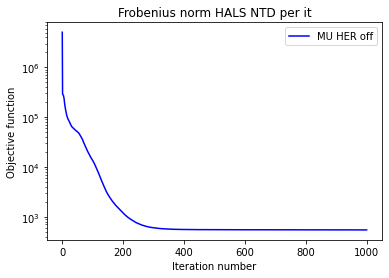

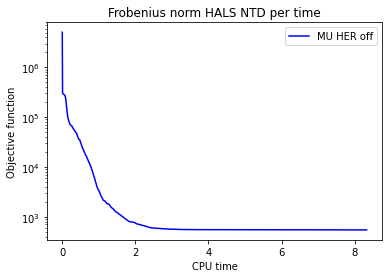

In [14]:
# first iteration shown?
it1 = 0

plt.figure(1)
plt.semilogy(cost_fct_vals[it1:], color='blue', label='MU HER off')
plt.xlabel('Iteration number')
plt.ylabel('Objective function')
plt.title('Frobenius norm HALS NTD per it')
plt.legend()
plt.show()

plt.figure(2)
plt.semilogy(toc[it1:],cost_fct_vals[it1:], color='blue', label='MU HER off')
plt.xlabel('CPU time')
plt.ylabel('Objective function')
plt.title('Frobenius norm HALS NTD per time')
plt.legend()
plt.show()